In [220]:
import json
import matplotlib.pyplot as plt

%matplotlib inline


In [221]:
DATASET_NAME = 'USpowerGrid'


In [222]:
# USpowerGrid
if DATASET_NAME == 'USpowerGrid':
    rp_filenames = [
        'q=all_seed=20_d=2022-11-14_07-33-23.json',
        'q=all_seed=20_d=2022-11-14_07-33-25.json',
        # 'q=all_seed=20_d=2022-11-14_07-33-29.json',
        'q=all_seed=20_d=2022-11-14_07-33-31.json'
    ]

    op_filenames = [
        'q=all_seed=20_target_quality=angular_resolution_date=2022-11-13_17-42-45.json',
        'q=all_seed=20_target_quality=aspect_ratio_date=2022-11-13_17-42-56.json',
        'q=all_seed=20_target_quality=crossing_angle_date=2022-11-13_17-43-05.json',
        'q=all_seed=20_target_quality=crossing_number_date=2022-11-13_17-43-18.json',
        'q=all_seed=20_target_quality=gabriel_graph_property_date=2022-11-14_02-46-57.json',
        'q=all_seed=20_target_quality=ideal_edge_length_date=2022-11-14_02-46-57.json',
        'q=all_seed=20_target_quality=node_resolution_date=2022-11-14_02-46-57.json',
        'q=all_seed=20_target_quality=run_time_date=2022-11-14_02-46-57.json',
        'q=all_seed=20_target_quality=shape_based_metrics_date=2022-11-14_02-46-57.json',
        'q=all_seed=20_target_quality=stress_date=2022-11-14_02-46-57.json'
    ]




In [223]:
# 1138_bus
if DATASET_NAME == '1138_bus':
    rp_filenames = [
        'q=all_seed=20_d=2022-11-17_08-18-22.json',
        'q=all_seed=20_d=2022-11-17_08-18-26.json',
        # 'q=all_seed=20_d=2022-11-17_08-18-28.json',
        # 'q=all_seed=20_d=2022-11-17_08-18-31.json'
    ]

    op_filenames = [
        'q=all_seed=20_target_quality=angular_resolution.json',
        'q=all_seed=20_target_quality=aspect_ratio.json',
        'q=all_seed=20_target_quality=crossing_angle.json',
        'q=all_seed=20_target_quality=crossing_number.json',
        'q=all_seed=20_target_quality=gabriel_graph_property.json',
        'q=all_seed=20_target_quality=ideal_edge_length.json',
        'q=all_seed=20_target_quality=node_resolution.json',
        'q=all_seed=20_target_quality=run_time.json',
        'q=all_seed=20_target_quality=shape_based_metrics.json',
        'q=all_seed=20_target_quality=stress.json'
    ]


In [224]:
quality_metrics_names = [
    'angular_resolution',
    'aspect_ratio',
    'crossing_angle',
    'crossing_number',
    'gabriel_graph_property',
    'ideal_edge_length',
    'node_resolution',
    'run_time',
    'shape_based_metrics',
    'stress'
]

In [225]:
# rp_path = f'data/rpfs/{DATASET_NAME}/q=all_seed=10_d=2022-11-10_14-18-50.json'
# op_path = f'data/opfs/{DATASET_NAME}/q=all_seed=20.json'


In [226]:
rdata = []
for rp_filename in rp_filenames:
    rp_path = f'data/rpfs/{DATASET_NAME}/{rp_filename}'
    with open(rp_path) as f:
        for row in f.readlines():
            rdata.append(json.loads(row))

odata = {}
for op_filename in op_filenames:
    op_path = f'data/opfs/{DATASET_NAME}/{op_filename}'
    for qn in quality_metrics_names:
        with open(op_path) as f:
            if qn in op_filename:
                odata[qn] = json.load(f)


In [233]:
rqs = {}
for qn in quality_metrics_names:
    rqs[qn] = []

qb = {}
for qn in quality_metrics_names:
    qb[qn] = []

for rd in rdata:
    qm = {}
    for qn in quality_metrics_names:
        qm[qn] = []
    print(rd['params'])
    for d in rd['data']:
        for qn in quality_metrics_names:
            qm[qn].append(d['quality'][qn])
    for qn in quality_metrics_names:
        rqs[qn].append(qm[qn])


{'edge_length': 30, 'number_of_pivots': 3866, 'number_of_iterations': 176, 'eps': 0.08994512259211444}
{'edge_length': 30, 'number_of_pivots': 2438, 'number_of_iterations': 59, 'eps': 0.5041004066203763}
{'edge_length': 30, 'number_of_pivots': 1612, 'number_of_iterations': 78, 'eps': 0.5301467460921383}
{'edge_length': 30, 'number_of_pivots': 2358, 'number_of_iterations': 12, 'eps': 0.7014413282308074}
{'edge_length': 30, 'number_of_pivots': 225, 'number_of_iterations': 102, 'eps': 0.8871801238346613}
{'edge_length': 30, 'number_of_pivots': 4600, 'number_of_iterations': 180, 'eps': 0.6340226122377018}
{'edge_length': 30, 'number_of_pivots': 871, 'number_of_iterations': 84, 'eps': 0.21541235347695745}
{'edge_length': 30, 'number_of_pivots': 208, 'number_of_iterations': 31, 'eps': 0.7172168861225726}
{'edge_length': 30, 'number_of_pivots': 2242, 'number_of_iterations': 63, 'eps': 0.018851248022594313}
{'edge_length': 30, 'number_of_pivots': 1368, 'number_of_iterations': 39, 'eps': 0.6377

In [228]:
oqs = {}
for qn in quality_metrics_names:
    oqs[qn] = []

qb = {}
for qn in quality_metrics_names:
    qb[qn] = []


for qn in quality_metrics_names:
    qm = {**qb}
    for o in odata[qn]['data'][qn]['data']:
        oqs[qn].append(o['quality'][qn])


In [229]:
from quality_metrics import angular_resolution, aspect_ratio, crossing_angle, crossing_number, gabriel_graph_property, ideal_edge_length, node_resolution, run_time, shape_based_metrics, stress

qmap = {
    'angular_resolution': angular_resolution,
    'aspect_ratio': aspect_ratio,
    'crossing_angle': crossing_angle,
    'crossing_number': crossing_number,
    'gabriel_graph_property': gabriel_graph_property,
    'ideal_edge_length': ideal_edge_length,
    'node_resolution': node_resolution,
    'run_time': run_time,
    'shape_based_metrics': shape_based_metrics,
    'stress': stress
}


[[4.097183472478054e-05, 4.080665142095714e-05, 0.00016851306348475203, 6.950829068100046e-05, 0.00023105720057421206, 0.0002516600871606305, 5.298180250713649e-05, 5.950857303096584e-06, 0.00035603022423642946, 0.0001593429917871281, 0.00012694096311076172, 1.6881073228314634e-05, 0.00019090776970466741, 0.00021286523403835498, 0.00015818178604840206, 0.00016835960271440107, 0.0002379991332790919, 0.00018414899840204902, 0.00030175301962326784, 2.878170222136202e-05], [0.00011567137795260946, 0.00015816496993618456, 0.0001786780451335034, 6.281182633176132e-06, 3.341352378414918e-05, 0.00018137244623720724, 4.562875257683343e-05, 0.00011873921326324271, 0.00039902704838392744, 0.0001437633534026875, 0.00046643771186817296, 0.0002127762922034038, 0.0002693168774157569, 7.80011465236922e-06, 0.00014360533154872984, 7.652057437686067e-05, 0.00021924753585898907, 0.00019732376335121626, 4.5339684415191046e-05, 0.000509664651194776], [4.0272897184337475e-06, 5.889397005635787e-05, 4.180661

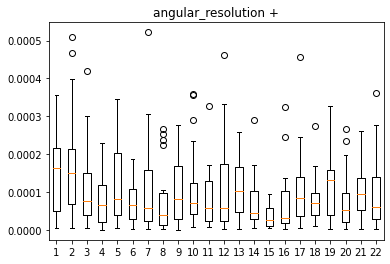

[[0.8710262179791362, 0.8721814160160316, 0.8692237160210845, 0.8775317315285107, 0.8778404768066056, 0.8795067451190349, 0.8755350786786557, 0.8803420247275155, 0.8761998061259894, 0.8792995018843168, 0.8747656254939871, 0.8743283966930007, 0.8699891142623197, 0.8759934481580195, 0.8803531397055666, 0.8698113756547263, 0.8791433487535004, 0.8768855348536246, 0.8741943611820188, 0.8744604408504524], [0.8755118380389161, 0.8773660934738418, 0.8742114321707977, 0.8739748975054195, 0.8755487348128571, 0.8741167830984962, 0.8764928218214578, 0.8742305888842091, 0.8758087269577923, 0.872928294695428, 0.8762108582958107, 0.876186283067211, 0.8741741687638389, 0.873397359609667, 0.8765039205921002, 0.8737166845230748, 0.8774424007065742, 0.8750362800419063, 0.8742469358359193, 0.8744724373098948], [0.8771260749337325, 0.8713082432684757, 0.8775150652723505, 0.8758371370409271, 0.8789130627044051, 0.8705392078657156, 0.8717992857079865, 0.8746462603830042, 0.877600266216091, 0.877752564452698,

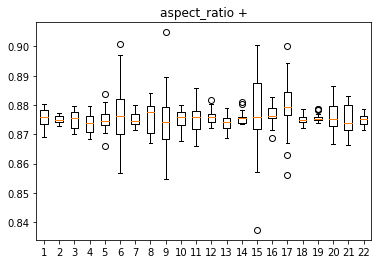

[[0.9977207695196237, 0.9979244649578706, 0.9981230084221805, 0.9956029566643596, 0.9962872256973284, 0.9961829422398472, 0.9970987006345317, 0.998145441625308, 0.9991151262851578, 0.9951130593393486, 0.9972361557847309, 0.9972836867537366, 0.9989785785133953, 0.9954490236361722, 0.9967598384309561, 0.9960551357908498, 0.9992179343638896, 0.9978265089732054, 0.9965194334105919, 0.9970209037235308], [0.9987265301721726, 0.9946379905373718, 0.9978644777733621, 0.9970443565484675, 0.9930256778319201, 0.9977434743625917, 0.9995215617938694, 0.9985661071550115, 0.996980095242365, 0.9991144218679433, 0.9971496961739738, 0.994702781522929, 0.996212850852676, 0.997754867558102, 0.9967109381976276, 0.9981611452962154, 0.9995308421311635, 0.9963937715707281, 0.9983449647067599, 0.995293238940688], [0.9968058704639355, 0.9981515191047439, 0.9976581066670633, 0.9981739894779079, 0.9933207457683614, 0.9987372912340162, 0.9967491352132752, 0.9992343179783064, 0.9968620521820081, 0.9990554881762652, 

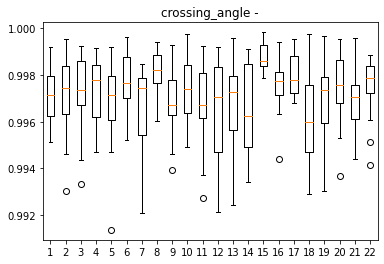

[[12283, 12262, 12363, 12439, 12348, 12363, 12307, 12325, 12402, 12389, 12383, 12449, 12414, 12346, 12397, 12364, 12370, 12439, 12268, 12361], [12382, 12382, 12352, 12547, 12286, 12466, 12293, 12444, 12406, 12470, 12538, 12544, 12467, 12622, 12356, 12379, 12365, 12293, 12384, 12488], [12887, 12913, 13012, 12670, 12912, 12512, 12865, 12502, 12943, 12454, 12744, 12906, 12784, 12870, 12891, 12618, 12567, 12626, 12733, 12963], [12658, 12766, 12969, 12808, 13128, 13300, 12939, 13145, 12913, 12998, 12720, 12645, 12552, 12748, 12886, 12827, 12883, 12796, 13155, 12894], [14741, 14458, 14587, 14494, 13713, 14842, 14521, 14503, 14184, 14610, 14459, 14447, 14576, 14360, 14709, 14358, 13995, 14366, 14167, 14119], [18857, 18815, 18991, 21048, 19787, 22474, 21034, 20007, 22147, 18805, 19128, 21676, 18094, 18835, 18681, 15827, 21194, 16471, 20144, 19580], [12855, 13275, 13463, 13289, 13147, 13091, 13291, 13293, 12678, 13278, 12843, 13217, 13339, 13141, 13191, 13261, 13341, 12705, 13285, 13174], [1310

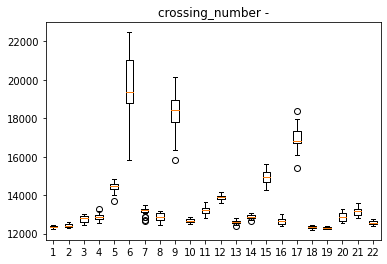

[[0.004305809874157629, 0.0033732083305478256, 0.006640156703617773, 0.0019958166196355773, 0.005357027838537045, 0.006232842446461834, 0.0011334981655963233, 0.005503468108446198, 0.006753675608812466, 0.002676378179931505, 0.006156686331722057, 0.006047873081105986, 0.0016472902166154771, 0.004540188464572359, 0.005050560186157304, 0.0019244584605172073, 0.0028706411841456555, 0.005361552368531738, 0.006722228801473506, 0.002324610213324021], [0.011015983841060903, 0.0026389584685878116, 0.0015983833153099304, 0.008590501208351036, 0.0032859727317980356, 0.007975434510064432, 0.007007637338676773, 0.003986353311288196, 0.009893134025781309, 0.007294848075598771, 0.007231240323470366, 0.005697956966520813, 0.006043338964107556, 0.005632041247475214, 0.005720070493179604, 0.010041473064483695, 0.0088765637594535, 0.008021492922369942, 0.0035015447198156204, 0.00421353635240782], [0.002263087989505728, 0.002896109541500404, 0.0031833339861255614, 0.004361739178702857, 0.0113089855720586

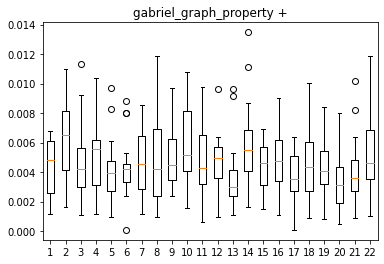

[[1864.5142426119542, 1880.090507501539, 1868.065782464426, 1859.586009076966, 1864.9386755127648, 1862.7381592143183, 1861.8791785854403, 1859.520082608081, 1894.6751634934155, 1877.0227640313647, 1858.3142616290036, 1867.8128705528206, 1863.6200656229846, 1865.716704198482, 1862.358992367787, 1857.2744710071279, 1857.8255117832516, 1857.2795242024815, 1873.0478981144718, 1865.6635921407421], [1883.7361606808056, 1903.8369001208127, 1884.9864765081738, 1868.5279164230665, 1918.0050667847297, 1879.024373669378, 1912.9509729597544, 1881.3291257534734, 1883.8244566434803, 1914.473366745425, 1886.2059113589955, 1895.8562587004753, 1886.7305867283662, 1868.05810488222, 1916.1252755094627, 1901.0880415210463, 1933.9265269002728, 1924.3049163126368, 1884.714931006135, 1894.4921168747992], [2045.6943336577958, 2087.1035974247266, 2075.139535711374, 1997.8497584246306, 2068.231695202065, 1984.3471655684282, 2063.1249075966984, 2027.711372083795, 2028.3284469058453, 1971.3792053220063, 2005.489

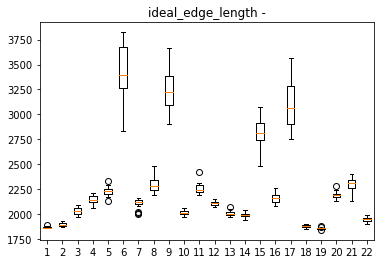

[[0.0032431994146754186, 0.0017803050669999026, 0.001396534087565314, 0.0034060082683990546, 0.003321233239425926, 0.005970293146743758, 0.0059849153948979255, 0.0017287420696060786, 0.002761729238216839, 0.004915946822511538, 0.012938514168907973, 0.00109690029898651, 0.002580470416270713, 0.010011750035655064, 0.0024725357509501715, 0.006041206375303594, 0.003922607610926308, 0.0020705969089295333, 0.0013374493956392855, 0.0016915191739606521], [0.0022240106109416295, 0.006189811598886394, 0.006183270431067443, 0.001321118111824907, 0.004889597085614135, 0.005386035809889902, 0.004620509269472258, 0.008435254520267787, 0.0051872347141446425, 0.004821723453360484, 0.002537403610917988, 0.0019447296477580892, 0.004983182951681285, 0.007245132112792527, 0.0026892731777065086, 0.006914798202262328, 0.002649887710583188, 0.0017183339864116755, 0.004455413088471155, 0.007888324302867298], [0.0055799772871472555, 0.0057178657837394994, 0.0017877283379140719, 0.0065382424221437025, 0.0047205

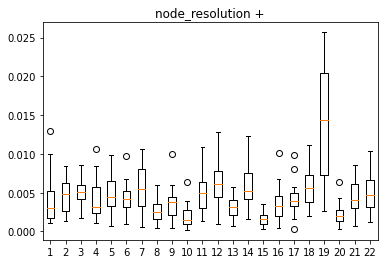

[[0.47065306100000726, 0.2231791169999724, 0.21674018699991393, 0.21137288299996726, 0.2067058000002362, 0.1954623349997746, 0.2048354329999711, 0.17703381600040302, 0.2005820849999509, 0.1932616930007498, 0.19365550400016218, 0.21364220199939155, 0.184890610000366, 0.19482726199930767, 0.2051689850013645, 0.18685543399988092, 0.1997263280009065, 0.18382424999981595, 0.1876378239994665, 0.18391438199978438], [402.4071908949991, 419.1309104360407, 429.5343745260034, 405.7311951710144, 415.30316609400325, 404.50046884600306, 411.65338959597284, 398.5147348679602, 430.42210664600134, 460.07457884401083, 456.02196426299633, 421.5081391709973, 411.58195363602135, 421.2387748869951, 415.5152756840107, 462.1464469899656, 412.8550428050221, 436.78300025401404, 460.5787149700336, 440.1239309819648], [90.36299455200788, 96.14275403501233, 86.96572972799186, 100.33072000503307, 87.29444603197044, 92.14792547700927, 87.37665456096875, 85.1922759860172, 91.22713697399013, 82.60616821201984, 86.1451

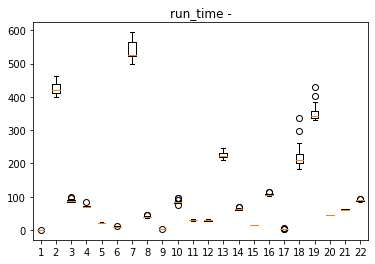

[[0.05982962622022557, 0.05998187650370698, 0.058568972675984834, 0.0593369403815874, 0.06066889559169494, 0.05871465594715244, 0.05850371924409337, 0.05907827225786091, 0.059271970269167494, 0.057592027356212126, 0.06162501154735343, 0.05984683884588031, 0.058845202131569456, 0.05840370564235224, 0.06012680134413315, 0.0589768805047874, 0.05867107240614455, 0.05949166223118967, 0.057405925158720804, 0.05947456318040502], [0.05911618708941663, 0.05715878194270881, 0.05886653096565184, 0.058424275970887896, 0.059019626482095196, 0.05776081933550423, 0.059862278140871, 0.05798485042519103, 0.057886336435687774, 0.05765645780897724, 0.05728531442910787, 0.05774049175592169, 0.05715770587956475, 0.058369424416358485, 0.05881315867431437, 0.060051026287887305, 0.05901120573827393, 0.05975250265138261, 0.05929217961393445, 0.058425164909096106], [0.05920249821067694, 0.05746157876638091, 0.058236760811852736, 0.05795825982183195, 0.05955360970224266, 0.059664501303629276, 0.05821704236539538

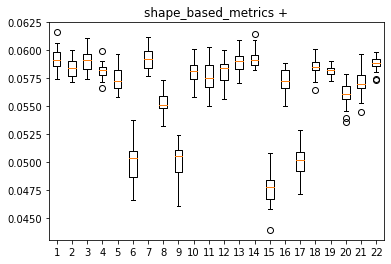

[[350893.9875797797, 350893.4408799346, 350917.4106700541, 350891.5806511947, 350892.93882465514, 350915.137660511, 350892.48054193996, 350892.6586929735, 350889.1016540048, 350893.3253582786, 350893.95972250815, 350893.14059903484, 350915.71118350106, 350889.0118589915, 350921.8876887306, 350893.10092891974, 350916.7290127064, 350894.0195376487, 350893.7225311375, 350893.3966059807], [351073.5430612804, 351087.3229042106, 351093.08374592505, 351059.17595760827, 351084.20795320964, 351071.72975216835, 351104.71316691104, 351087.0941736326, 351098.79533634265, 351107.7156319021, 351068.97569301905, 351077.9930901897, 351097.2287684371, 351088.5781272804, 351086.964995503, 351108.7845696277, 351120.5201208092, 351085.9224653061, 351069.23531279847, 351082.84835937433], [351713.5989599106, 351633.19224267383, 351687.3763407998, 351567.4511127063, 351604.55166989274, 351612.63379547646, 351612.13734275085, 351525.1962384753, 351558.155561331, 351547.4002831486, 351592.5325088605, 351679.52

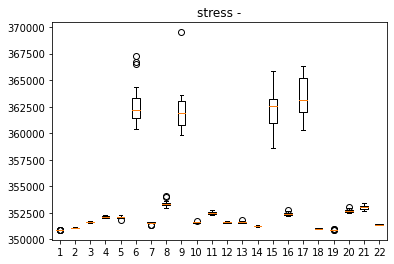

In [231]:
for qn in quality_metrics_names:
    b_data = [oqs[qn], *rqs[qn]]
    plt.title(f"{qn} {'+' if qmap[qn].direction == 'maximize' else '-'}")
    plt.boxplot(b_data)
    plt.savefig(f'images/optimization/{DATASET_NAME}/{qn}.png',
                format='png', dpi=300, facecolor='white')
    plt.show()
